#### COVID-19 - SARS - H1N1 - EBOLA 

In this notebook we will try to compare theses 4 virus.


### Imports and utils

In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

final_columns = ['Date', 'Country', 'Cases', 'Deaths']
colors = ['black', 'red', 'green', 'blue']

### Covid dataset

In [475]:
# import csv 
covid = pd.read_csv('covid.csv', parse_dates=['Date'])

# filter columns
covid = covid[['Date', 'Country/Region', 'Confirmed', 
                   'Deaths']]

# rename columns
covid.columns = final_columns

covid.head()

,Date,Country,Cases,Deaths
0,2020-01-22,Thailand,2,0
1,2020-01-22,Japan,2,0
2,2020-01-22,Singapore,0,0
3,2020-01-22,Nepal,0,0
4,2020-01-22,Malaysia,0,0


### Sars dataset

In [476]:
# import csv
sars = pd.read_csv('sars.csv', parse_dates=['Date'])

# filter columns
sars = sars[['Date', 'Country', 'Cumulative number of case(s)', 
                   'Number of deaths']]

# rename columns
sars.columns = final_columns

sars.head()

,Date,Country,Cases,Deaths
0,2003-03-17,Germany,1,0
1,2003-03-17,Canada,8,2
2,2003-03-17,Singapore,20,0
3,2003-03-17,"Hong Kong SAR, China",95,1
4,2003-03-17,Switzerland,2,0


### H1N1 dataset

In [477]:
# import csv
h1n1 = pd.read_csv('h1n1.csv', encoding= 'unicode_escape', parse_dates=['Update Time'])

# filter columns
h1n1 = h1n1[['Update Time', 'Country', 'Cases', 
                   'Deaths']]

# replace nan for 0
h1n1 = h1n1.replace(np.nan, 0)

# rename columns
h1n1.columns = final_columns

# sorting 
h1n1.sort_values(by=['Date'], inplace=True, ascending=True)

h1n1.head()

,Date,Country,Cases,Deaths
1821,2009-05-23 08:00:00,Grand Total,12022,86.0
1796,2009-05-23 08:00:00,Guatemala,4,0.0
1795,2009-05-23 08:00:00,Greece,1,0.0
1794,2009-05-23 08:00:00,Germany,17,0.0
1793,2009-05-23 08:00:00,France,16,0.0


### Ebola

In [478]:
ebola = pd.read_csv('ebola.csv', parse_dates=['Date'])

# filter columns
ebola = ebola[['Date', 'Country', 'No. of confirmed cases', 'No. of confirmed deaths']]

# rename columns
ebola.columns = final_columns

# replace nan for 0
ebola = ebola.replace(np.nan, 0)

# sorting 
ebola.sort_values(by=['Date'], inplace=True, ascending=True)

ebola.head()

,Date,Country,Cases,Deaths
0,2014-08-29,Guinea,482.0,287.0
1,2014-08-29,Nigeria,15.0,6.0
2,2014-08-29,Sierra Leone,935.0,380.0
3,2014-08-29,Liberia,322.0,225.0
4,2014-09-05,Sierra Leone,1146.0,443.0


### Putting all togheter

In [514]:
covid_cases = sum(covid['Cases'])
sars_cases = sum(sars['Cases'])
h1n1_cases = sum(h1n1['Cases'])
ebola_cases = sum(ebola['Cases'])

covid_deaths = sum(covid['Deaths'])
sars_deaths = sum(sars['Deaths'])
h1n1_deaths = sum(h1n1['Deaths'])
ebola_deaths = sum(ebola['Deaths'])

covid_countries = len(covid['Country'].value_counts())
sars_countries = len(sars['Country'].value_counts())
h1n1_countries = len(h1n1['Country'].value_counts())
ebola_countries = len(ebola['Country'].value_counts())

all_virus = pd.DataFrame({
    'virus' : ['COVID', 'SARS', 'H1N1', 'EBOLA'],
    'cases': [covid_cases, sars_cases, h1n1_cases, ebola_cases],
    'deaths' : [covid_deaths, sars_deaths, h1n1_deaths, ebola_deaths],
    'countries': [covid_countries, sars_countries, h1n1_countries, ebola_countries]
})

all_virus['lethality'] = round((all_virus['deaths']/all_virus['cases'])*100, 2)

all_virus.head()

,virus,cases,deaths,countries,lethality
0,COVID,2852138.0,87375.0,114,3.06
1,SARS,556360.0,45209.0,37,8.13
2,H1N1,1641738.0,7859.0,152,0.48
3,EBOLA,3568555.0,1288179.0,10,36.10


### Lethality

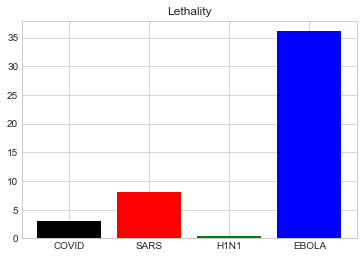

In [515]:
plt.bar(all_virus['virus'], all_virus['lethality'], color=colors)
plt.title('Lethality')
plt.show()

### Country popagation

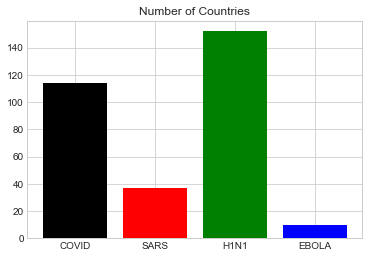

In [498]:
plt.bar(all_virus['virus'], all_virus['countries'], color=colors)
plt.title('Number of Countries')
plt.show()

### Propagation 

##### Functions

In [506]:
def group_cases_by_date(df):
    return df.groupby(df['Date'])['Cases'].sum().reset_index()
    
def plot(df, virus):
    plt.title('Propagation of ' + virus)
    plt.plot(df['Date'], df['Cases'])
    
    
# mean of propagation per day func
def increasing_mean(df, column):
    percentages = []
    for index, row in df.iterrows(): 
        if(index > 0):     
            increase = row[column] - last_row[column]   
            percentage = round(increase / last_row[column] * 100, 2)
            percentages.append(percentage) 
        
        last_row = row
        
    return np.mean(percentages)

#### Covid Propagation

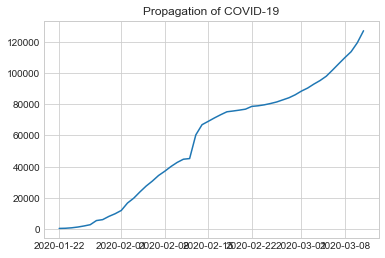

In [507]:
# Covid propagation
c_date = group_cases_by_date(covid)
plot(c_date, 'COVID-19')

#### Sars Propagation

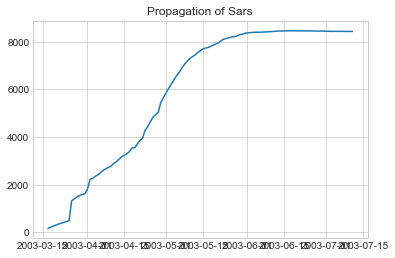

In [508]:
# Sars dissemination
s_date = group_cases_by_date(sars)
plot(s_date, 'Sars')

#### H1N1 Propagation

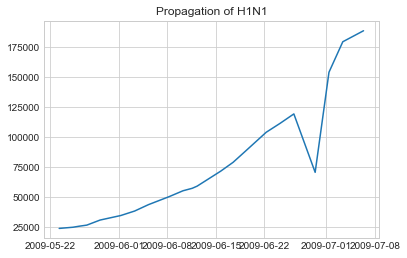

In [509]:
# H1n1 dissemination
h_date = group_cases_by_date(h1n1)
plot(h_date, 'H1N1')

#### Ebola Propagation

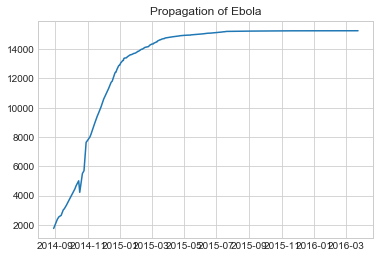

In [511]:
# Ebola propagation
e_date = group_cases_by_date(ebola)
plot(e_date, 'Ebola')

### Comparing propagation mean

In [512]:
c_mean_prop = increasing_mean(c_date, 'Cases')
s_mean_prop = increasing_mean(s_date, 'Cases')
h_mean_prop = increasing_mean(h_date, 'Cases')
e_mean_prop = increasing_mean(e_date, 'Cases')

comparing_propagation_mean = pd.DataFrame({
    'virus' : ['COVID', 'SARS', 'H1N1', 'EBOLA'],
    'mean': [c_mean_prop, s_mean_prop, h_mean_prop, e_mean_prop]
})

comparing_propagation_mean.head()

,virus,mean
0,COVID,12.880612
1,SARS,5.057895
2,H1N1,12.818095
3,EBOLA,0.913295


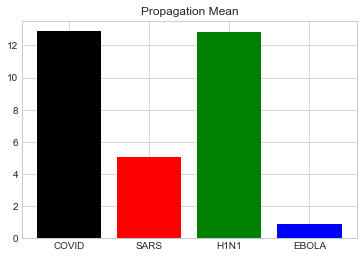

In [513]:
plt.bar(comparing_propagation_mean['virus'], comparing_propagation_mean['mean'], color=colors)
plt.title('Propagation Mean')
plt.show()